# 2D Laplace equation

When studying equilibrium properties in engineering, you'll likely come across the [**Laplace equation**](https://en.wikipedia.org/wiki/Laplace%27s_equation). 
This relies on calculating the _Laplacian_, which you learned in CME 100 as $\nabla^2 \stackrel{\text{def}}{=} \dfrac{\partial^2}{\partial x^2} + \dfrac{\partial^2}{\partial y^2} + \dfrac{\partial^2}{\partial z^2}$.
In this example, we will use it to model the steady-state temperature distribution in 2D, which can be solved using Fourier series and visualized.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`np.sinh(x)`](https://numpy.org/doc/stable/reference/generated/numpy.sinh.html) - Calculate the [hyperbolic sine](https://www.mathsisfun.com/sets/function-hyperbolic.html) of `x`.
- [`np.meshgrid(x, y)`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) - Create a 2D grid of coordinate values based on 1D `x` and `y` arrays.
    - The result is two `X` and `Y` 2D arrays with the corresponding 1D arrays tiled across the other dimension.
- [`ax.pcolormesh(X, Y, C)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html) - Create a pseudocolor plot of `C` values on a grid defined by `(X, Y)`.
- [`fig.colorbar(obj)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.colorbar.html) - Add a color bar corresponding to the `obj` plot element.

## Demo

A rectangular plate is bounded by 

$$ \begin{alignat}{2}
x &= 0, \quad x &&= 1 \\
y &= 0, \quad y &&= 1
\end{alignat} $$

with the following boundary conditions: 

$$ \begin{alignat}{2} 
T(x, 0) &= 0, \quad T(1, y) &&= 0 \\
T(0, y) &= 0, \quad T(x, 1) &&= 100
\end{alignat} $$

The steady-state temperature distribution is governed by $\dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2} = 0$.
The solution is:

$$ T(x,y) = \sum_{n=\text{odd}}^{\infty} \dfrac{400}{n \pi \sinh(n \pi)} \sin(n\pi x) \sinh(n \pi y)$$

Plot this temperature distribution.

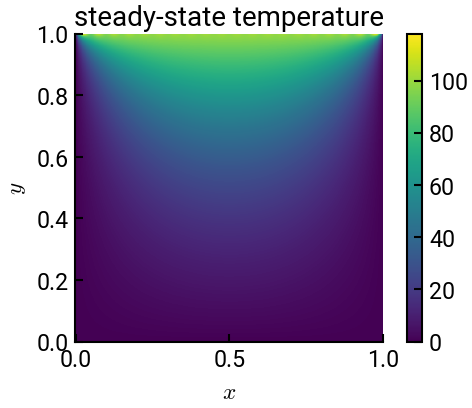

In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# create grid
x = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, x)
nmax = 40

# Fourier series
T = np.zeros(X.shape)
for n in np.arange(1, nmax, 2):
    Bn = 400 / (n * np.pi * np.sinh(n * np.pi))
    T += Bn * np.sin(n * np.pi * X) * np.sinh(n * np.pi * Y)

fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, T)
# im = ax.imshow(T, origin='lower')   # multiple ways to solve a problem!
plt.colorbar(im)
ax.set(xlabel="$x$", ylabel="$y$", title="steady-state temperature", aspect='equal')
plt.show()

```{tip}
By default, Python 2D arrays have $(0,0)$ in the upper-left corner.
In `ax.imshow()`, we can explicitly pass the `origin` parameter to change the origin to the lower-left corner.
```